In [1]:
# find best params 
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL',
       'KITCHENS', 'FIREPLACES', 'LANDAREA', 'SOURCE', 'LATITUDE', 'LONGITUDE',
       'LuxL'],
      dtype='object')

In [6]:
class_weights = {0:1, 1:2}
model = RandomForestClassifier(random_state = 0, class_weight=class_weights)
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 0)
rdf = RandomForestClassifier(random_state = 0) 
params = {'max_depth': [6, 8, 10, 20], 
              'min_samples_split': [5, 10, 15],
              'min_samples_leaf' : [4, 8, 12],
              'n_estimators' : [300, 400, 500]
             }
grid_clf = GridSearchCV(estimator = model, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_clf.fit(df_train.iloc[:, :-1], df_train['LuxL'])

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 52.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 2},
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [6, 8, 10, 20], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [4, 8, 12], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [7]:
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 2},
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 400}


In [8]:
X = df_train.iloc[:, [18, 19]].values

<module 'matplotlib.pyplot' from 'C:\\Users\\17247\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

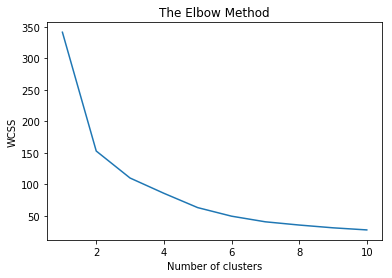

In [15]:
# Using the elbow method to find the optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt